# Pytorch Basics

In [1]:
### Code Cell to Test PyTorch

import torch
print(torch.__version__)
import torchvision
import torchvision.transforms as transforms
print(torchvision.__version__)

x = torch.rand(5, 3)
print(x)

transforms.RandomRotation(0.7)
transforms.RandomRotation([0.9, 0.2])

t = transforms.RandomRotation(10)
angle = t.get_params(t.degrees)

print(angle)


2.2.2
0.17.2
tensor([[0.5459, 0.9667, 0.9904],
        [0.4508, 0.7616, 0.6088],
        [0.8928, 0.8345, 0.8830],
        [0.8426, 0.0024, 0.0645],
        [0.2407, 0.1510, 0.9054]])
-6.572018623352051


## Why PyTorch?

*All the quotes will come from the PyTorch About Page http://pytorch.org/about/ from which we'll plagiarize shamelessly.  After all, who better to tout the virtues of PyTorch than the creators?*


### What is PyTorch?

According to the PyTorch about page, "PyTorch is a python package that provides two high-level features:

- Tensor computation (like numpy) with strong GPU acceleration
- Deep Neural Networks built on a tape-based autograd system"

### Why is it getting so popular?

#### It's quite fast

"PyTorch has minimal framework overhead. We integrate acceleration libraries such as Intel MKL and NVIDIA (CuDNN, NCCL) to maximize speed. At the core, it’s CPU and GPU Tensor and Neural Network backends (TH, THC, THNN, THCUNN) are written as independent libraries with a C99 API.
They are mature and have been tested for years.

Hence, PyTorch is quite fast – whether you run small or large neural networks."

#### Imperative programming experience

"PyTorch is designed to be intuitive, linear in thought and easy to use. When you execute a line of code, it gets executed. There isn’t an asynchronous view of the world. When you drop into a debugger, or receive error messages and stack traces, understanding them is straight-forward. The stack-trace points to exactly where your code was defined. We hope you never spend hours debugging your code because of bad stack traces or asynchronous and opaque execution engines."

"PyTorch is not a Python binding into a monolothic C++ framework. It is built to be deeply integrated into Python. You can use it naturally like you would use numpy / scipy / scikit-learn etc. You can write your new neural network layers in Python itself, using your favorite libraries and use packages such as Cython and Numba. Our goal is to not reinvent the wheel where appropriate."

#### Takes advantage of GPUs easily

"PyTorch provides Tensors that can live either on the CPU or the GPU, and accelerate compute by a huge amount.

We provide a wide variety of tensor routines to accelerate and fit your scientific computation needs such as slicing, indexing, math operations, linear algebra, reductions. And they are fast!"


#### Dynamic Graphs!!!

"Most frameworks such as TensorFlow, Theano, Caffe and CNTK have a static view of the world. One has to build a neural network, and reuse the same structure again and again. Changing the way the network behaves means that one has to start from scratch.

With PyTorch, we use a technique called Reverse-mode auto-differentiation, which allows you to change the way your network behaves arbitrarily with zero lag or overhead. Our inspiration comes from several research papers on this topic, as well as current and past work such as autograd, autograd, Chainer, etc.

While this technique is not unique to PyTorch, it’s one of the fastest implementations of it to date. You get the best of speed and flexibility for your crazy research."



## Working with PyTorch Basics

Enough of the sales pitch!  Let's start to understand the PyTorch basics.

The basic unit of PyTorch is a tensor (basically a multi-dimensional array like a np.ndarray).

![](https://cdn-images-1.medium.com/max/2000/1*_D5ZvufDS38WkhK9rK32hQ.jpeg)

(image borrowed from https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32 )

We can create PyTorch tensors directly.

In [2]:
# from https://www.stefanfiott.com/machine-learning/tensors-and-gradients-in-pytorch/
def tensor_properties(t, show_value=True):
    print('Tensor properties:')
    props = [('rank', t.dim()),
             ('shape', t.size()),
             ('data type', t.dtype),
             ('tensor type', t.type())]
    for s,v in props:
        print('\t{0:12}: {1}'.format(s,v))
    if show_value:
        #print('{0:12}: {1}'.format('value',t))
        print("Value:")
        print(t)

In [3]:
# torch.tensor always copies data. See below for 0-copy
scalar = torch.tensor(5)
tensor_properties(scalar)

Tensor properties:
	rank        : 0
	shape       : torch.Size([])
	data type   : torch.int64
	tensor type : torch.LongTensor
Value:
tensor(5)


In [4]:
## You can create torch.Tensor objects by giving them data directly

#  1D vector
vector_input = [1., 2., 3., 4., 5., 6.]
vector = torch.tensor(vector_input)
tensor_properties(vector)

Tensor properties:
	rank        : 1
	shape       : torch.Size([6])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([1., 2., 3., 4., 5., 6.])


In [5]:
# Matrix
matrix_input = [[1., 2., 3.], [4., 5., 6]]
matrix = torch.tensor(matrix_input)
tensor_properties(matrix)

Tensor properties:
	rank        : 2
	shape       : torch.Size([2, 3])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [6]:
# Create a 3D tensor of size 2x2x2.
tensor_input = [[[1., 2.], [3., 4.]],
          [[5., 6.], [7., 8.]]]
tensor3d = torch.tensor(tensor_input)

tensor_properties(tensor3d)

Tensor properties:
	rank        : 3
	shape       : torch.Size([2, 2, 2])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])


They can be created without any initialization or initialized with random data from uniform (rand()) or normal (randn()) distributions

In [7]:
# Tensors with no initialization
x_1 = torch.Tensor(2, 5)
y_1 = torch.Tensor(3, 5)
tensor_properties(x_1)
tensor_properties(y_1)

Tensor properties:
	rank        : 2
	shape       : torch.Size([2, 5])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
Tensor properties:
	rank        : 2
	shape       : torch.Size([3, 5])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [8]:
# Tensors initialized from uniform
x_2 = torch.rand(5, 3)
y_2 = torch.rand(5, 5)

tensor_properties(x_2)
tensor_properties(y_2)

Tensor properties:
	rank        : 2
	shape       : torch.Size([5, 3])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[0.0392, 0.9306, 0.1611],
        [0.9746, 0.5795, 0.9030],
        [0.4360, 0.8093, 0.1229],
        [0.3461, 0.3506, 0.8834],
        [0.2004, 0.3575, 0.8883]])
Tensor properties:
	rank        : 2
	shape       : torch.Size([5, 5])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[0.4399, 0.6357, 0.0574, 0.0102, 0.4375],
        [0.1609, 0.3153, 0.5308, 0.0129, 0.4970],
        [0.6542, 0.2706, 0.5435, 0.9208, 0.6663],
        [0.2864, 0.4663, 0.4117, 0.6146, 0.9518],
        [0.5659, 0.5024, 0.9389, 0.3811, 0.9331]])


In [9]:
# Tensors initialized from normal
x_3 = torch.randn(5, 3)
y_3 = torch.randn(5, 5)

tensor_properties(x_3)
tensor_properties(y_3)

Tensor properties:
	rank        : 2
	shape       : torch.Size([5, 3])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[-1.8983,  1.4574, -0.4131],
        [ 1.2422, -0.8654, -0.6743],
        [ 0.1341,  0.7286, -0.0587],
        [-0.1311, -0.6202,  0.9763],
        [ 0.5793, -1.7198,  0.3197]])
Tensor properties:
	rank        : 2
	shape       : torch.Size([5, 5])
	data type   : torch.float32
	tensor type : torch.FloatTensor
Value:
tensor([[-0.4349, -1.5923, -0.3930, -0.2002,  1.1021],
        [-1.1001, -1.0965,  0.6264, -0.4382, -0.4905],
        [-0.0200,  1.1412,  0.6453,  1.0767,  1.0157],
        [-1.1531, -0.1024, -1.2901,  0.5567, -1.1099],
        [-0.6277,  1.4569, -2.3421, -0.8137, -0.8233]])


The expected operations (arithmetic operations, addressing, etc) are all in place.

In [10]:
# Expect (2,5)
print(x_1.size())

print(x_1)


# Addition
print(x_2)
print(x_3)

print(x_2 + x_3)

# Addressing
print(x_3[:, 2])

torch.Size([2, 5])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0.0392, 0.9306, 0.1611],
        [0.9746, 0.5795, 0.9030],
        [0.4360, 0.8093, 0.1229],
        [0.3461, 0.3506, 0.8834],
        [0.2004, 0.3575, 0.8883]])
tensor([[-1.8983,  1.4574, -0.4131],
        [ 1.2422, -0.8654, -0.6743],
        [ 0.1341,  0.7286, -0.0587],
        [-0.1311, -0.6202,  0.9763],
        [ 0.5793, -1.7198,  0.3197]])
tensor([[-1.8592,  2.3880, -0.2520],
        [ 2.2168, -0.2859,  0.2286],
        [ 0.5702,  1.5379,  0.0642],
        [ 0.2150, -0.2696,  1.8597],
        [ 0.7797, -1.3623,  1.2080]])
tensor([-0.4131, -0.6743, -0.0587,  0.9763,  0.3197])


It's easy to move between PyTorch and Numpy worlds with numpy() and torch.from_numpy()

In [11]:
# PyTorch --> Numpy
print(x_1)
print(x_1.numpy())

print(type(x_1))
print(type(x_1.numpy()))

numpy_x_1 = x_1.numpy()

# does not makes a copy: just wraps a tensor object around the numpy array
pytorch_x_1 = torch.from_numpy(numpy_x_1)

print(type(numpy_x_1))
print(type(pytorch_x_1))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>


Finally PyTorch provides some convenience mechanisms for concatenating Tensors via torch.cat() and reshaping them with  .view() 

In [24]:
## Concatenating

# By default, it concatenates along the zeroth(first) axis (concatenates rows)
x_1 = torch.randn(2, 5)
y_1 = torch.randn(3, 5)
z_1 = torch.cat([x_1, y_1])
print(z_1.shape)

# Concatenate columns:
x_2 = torch.randn(2, 3)
y_2 = torch.randn(2, 5)
# second arg specifies which axis to concat along
z_2 = torch.cat([x_2, y_2], 1)
print(z_2.shape)

## Reshaping
x = torch.randn(2, 3, 4)
print(x)
print(x.view(2, 12))  # Reshape to 2 rows, 12 columns
# Same as above.  If one of the dimensions is -1, its size can be inferred
print(x.view(2, -1))

torch.Size([5, 5])
torch.Size([2, 8])
tensor([[[-0.3238, -1.1609, -2.0932,  0.4728],
         [-2.0533, -1.0469,  0.0503,  0.8404],
         [-0.4482, -0.9700, -0.0431, -0.0911]],

        [[ 1.9733, -2.2664,  0.1117, -2.0043],
         [ 1.3119, -1.0286,  1.5309, -0.3219],
         [-0.5133,  1.3478, -0.8362, -0.4039]]])
tensor([[-0.3238, -1.1609, -2.0932,  0.4728, -2.0533, -1.0469,  0.0503,  0.8404,
         -0.4482, -0.9700, -0.0431, -0.0911],
        [ 1.9733, -2.2664,  0.1117, -2.0043,  1.3119, -1.0286,  1.5309, -0.3219,
         -0.5133,  1.3478, -0.8362, -0.4039]])
tensor([[-0.3238, -1.1609, -2.0932,  0.4728, -2.0533, -1.0469,  0.0503,  0.8404,
         -0.4482, -0.9700, -0.0431, -0.0911],
        [ 1.9733, -2.2664,  0.1117, -2.0043,  1.3119, -1.0286,  1.5309, -0.3219,
         -0.5133,  1.3478, -0.8362, -0.4039]])


Variables (and now tensors requiring gradients) come with a .backward() that allows them to do autodifferentiation via backwards propagation.  

## From numpy to pytorch and back

In [26]:
import numpy as np
import gzip
import struct

def read_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    return images

# Load the training images
train_images = read_mnist_images('data/MNIST/raw/train-images-idx3-ubyte.gz')

# Convert to float and scale to [0, 1]
train_images = train_images.astype(np.float32) / 255.0

# Calculate mean and standard deviation
mean = np.mean(train_images)
std = np.std(train_images)

print(f"Mean: {mean:.4f}")
print(f"Standard Deviation: {std:.4f}")

Mean: 0.1307
Standard Deviation: 0.3081


In [27]:
import torch
from torch.utils.data import TensorDataset, DataLoader

def read_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, rows, cols)
    return images

def read_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

In [28]:
# Load the data
train_images = read_mnist_images('data/MNIST/raw/train-images-idx3-ubyte.gz')
train_labels = read_mnist_labels('data/MNIST/raw/train-labels-idx1-ubyte.gz')
test_images = read_mnist_images('data/MNIST/raw/t10k-images-idx3-ubyte.gz')
test_labels = read_mnist_labels('data/MNIST/raw/t10k-labels-idx1-ubyte.gz')

# Normalize the data
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

In [29]:
# Using with NumPy
print("NumPy array shapes:")
print(f"Train images: {train_images.shape}")
print(f"Train labels: {train_labels.shape}")
print(f"Test images: {test_images.shape}")
print(f"Test labels: {test_labels.shape}")

# Example of accessing a single image and label
print("\nExample image (NumPy):")
print(train_images[0])
print(f"Label: {train_labels[0]}")

NumPy array shapes:
Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)

Example image (NumPy):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0. 

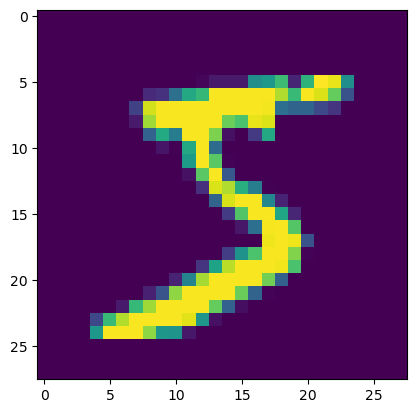

In [31]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

In [32]:
# Using with PyTorch
# Convert NumPy arrays to PyTorch tensors
train_images_torch = torch.from_numpy(train_images).unsqueeze(1)  # Add channel dimension
print("Train Images Shape", train_images_torch.shape)
train_labels_torch = torch.from_numpy(train_labels).long()
test_images_torch = torch.from_numpy(test_images).unsqueeze(1)  # Add channel dimension
test_labels_torch = torch.from_numpy(test_labels).long()

# Create TensorDatasets
train_dataset = TensorDataset(train_images_torch, train_labels_torch)
test_dataset = TensorDataset(test_images_torch, test_labels_torch)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("\nPyTorch tensor shapes:")
print(f"Train images: {train_images_torch.shape}")
print(f"Train labels: {train_labels_torch.shape}")
print(f"Test images: {test_images_torch.shape}")
print(f"Test labels: {test_labels_torch.shape}")

# Example of accessing a single image and label
print("\nExample image (PyTorch):")
print(train_images_torch[0])
print(f"Label: {train_labels_torch[0]}")

# Example of using DataLoader
for images, labels in train_loader:
    print("\nBatch shapes:")
    print(f"Images: {images.shape}")
    print(f"Labels: {labels.shape}")
    break  # Just print the first batch

Train Images Shape torch.Size([60000, 1, 28, 28])

PyTorch tensor shapes:
Train images: torch.Size([60000, 1, 28, 28])
Train labels: torch.Size([60000])
Test images: torch.Size([10000, 1, 28, 28])
Test labels: torch.Size([10000])

Example image (PyTorch):
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

/var/folders/wq/mr3zj9r14dzgjnq9rjx_vqbc0000gn/T/ipykernel_92032/3573648036.py:5: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403251597/work/torch/csrc/utils/tensor_numpy.cpp:212.)
  train_labels_torch = torch.from_numpy(train_labels).long()
